## **Network Visualization in Python ~ part 2**

This notebook was prepared by **Yessica Herrera-Guzmán** for the Network Science course at [Universidad del Desarrollo](https://www.udd.cl).

## **Part 2: Network visualization of edge attributes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import math
import csv
import community
import seaborn as sns
sns.set(context='notebook', style='ticks', font='Fira Sans', palette='husl', font_scale=2)

In [2]:
# Load nodelist
node_names = pd.read_csv('NYCBnodelist.csv') 

In [3]:
node_names.head(1)

,value,artist_type,gender
0,John Taras,Design,male


In [4]:
# Get a tuple with node names and their attributes
node_names['nodes'] = node_names[['value','artist_type', 'gender']].apply(tuple, axis=1)

In [5]:
node_tolist = node_names['nodes'].tolist()

In [6]:
# Creates nodelist
node_code = [n[0] for n in node_tolist]

In [7]:
# Load edgelist
edge_names = pd.read_csv('NYCBedgelist.csv') 

In [8]:
edge_names.head(1)

,source,target,type
0,Aaron Copland,April Gornik,1


In [9]:
# Get a tuple with node pairs (edges)
edge_names['edg'] = edge_names[['source', 'target']].apply(tuple, axis=1)

In [10]:
# Creates edgelist
edg = edge_names['edg'].tolist()

In [11]:
# Get a tuple with edge attributes
edge_names['edges'] = edge_names[['source', 'target', 'type']].apply(tuple, axis=1)

In [12]:
edge = edge_names['edges'].tolist()

**Network**

In [13]:
g = nx.Graph()

In [14]:
g.add_nodes_from(node_code)

In [15]:
g.add_edges_from(edg)

In [16]:
# Create dictionaire of node attribute: artist_type
gender_dict = {}

for node in node_tolist: 
    gender_dict[node[0]] = node[2]

In [17]:
nx.set_node_attributes(g, gender_dict, 'gender')

In [18]:
type_dict = {}

for e in edge: 
    type_dict[e[0], e[1]] = e[2]

In [19]:
nx.set_edge_attributes(g, type_dict, 'type')

In [20]:
# Remove self-loops
g.remove_edges_from(nx.selfloop_edges(g))

In [21]:
print(nx.info(g))

Graph with 549 nodes and 2202 edges


We will further process the network visualization using **Force atlas 2** over the giant component of the network.

In [22]:
giant = g.subgraph(max(nx.connected_components(g), key=len))

In [23]:
from fa2 import ForceAtlas2

In [24]:
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=1.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=0.5,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=300.0,
                          strongGravityMode=False,
                          gravity=1.0,

                          # Log
                          verbose=True)

In [25]:
# Create layout
atlas = forceatlas2.forceatlas2_networkx_layout(giant, pos=None, iterations=1000)

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 377.60it/s]

BarnesHut Approximation  took  0.39  seconds
Repulsion forces  took  2.12  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.06  seconds


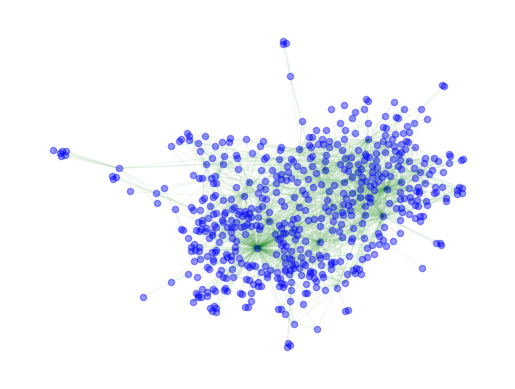

In [26]:
# Test layout
nx.draw_networkx_nodes(giant, atlas, node_size=20, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(giant, atlas, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

**Visualization of by edge attribute**

In [27]:
# Create color dictionare for nodes by their gender
node_gender = []

# for each node in the graph
for node in giant.nodes(data=True):

    # if the node has the attribute group1
    if 'female' in node[1]['gender']:
        node_gender.append('rebeccapurple') #female

    # if the node has the attribute group1
    elif 'male' in node[1]['gender']:
        node_gender.append('mediumseagreen') #male
        
    # if the node has the attribute group1
    elif 'various' in node[1]['gender']:
        node_gender.append('khaki') #mixed
        
    # if the node has the attribute group1
    elif 'unknown' in node[1]['gender']:
        node_gender.append('darkgray') #mixed

In [28]:
# Create color dictionare for edges by their type
edge_females = []

for e in giant.edges():
    edge_type = giant[e[0]][e[1]]['type']
    
    if edge_type == 1:
        edge_females.append('silver') 
    elif edge_type == 2:
        edge_females.append('rebeccapurple')  # female
    elif edge_type == 3:
        edge_females.append('silver')

In [29]:
# Create color dictionare for edges by their type
edge_males = []

for e in giant.edges():
    edge_type = giant[e[0]][e[1]]['type']
    
    if edge_type == 1:
        edge_males.append('silver') 
    elif edge_type == 2:
        edge_males.append('silver')  
    elif edge_type == 3:
        edge_males.append('#37A862') # male

In [30]:
# Degree dictionary to adjust node size
d = dict(nx.degree(giant))

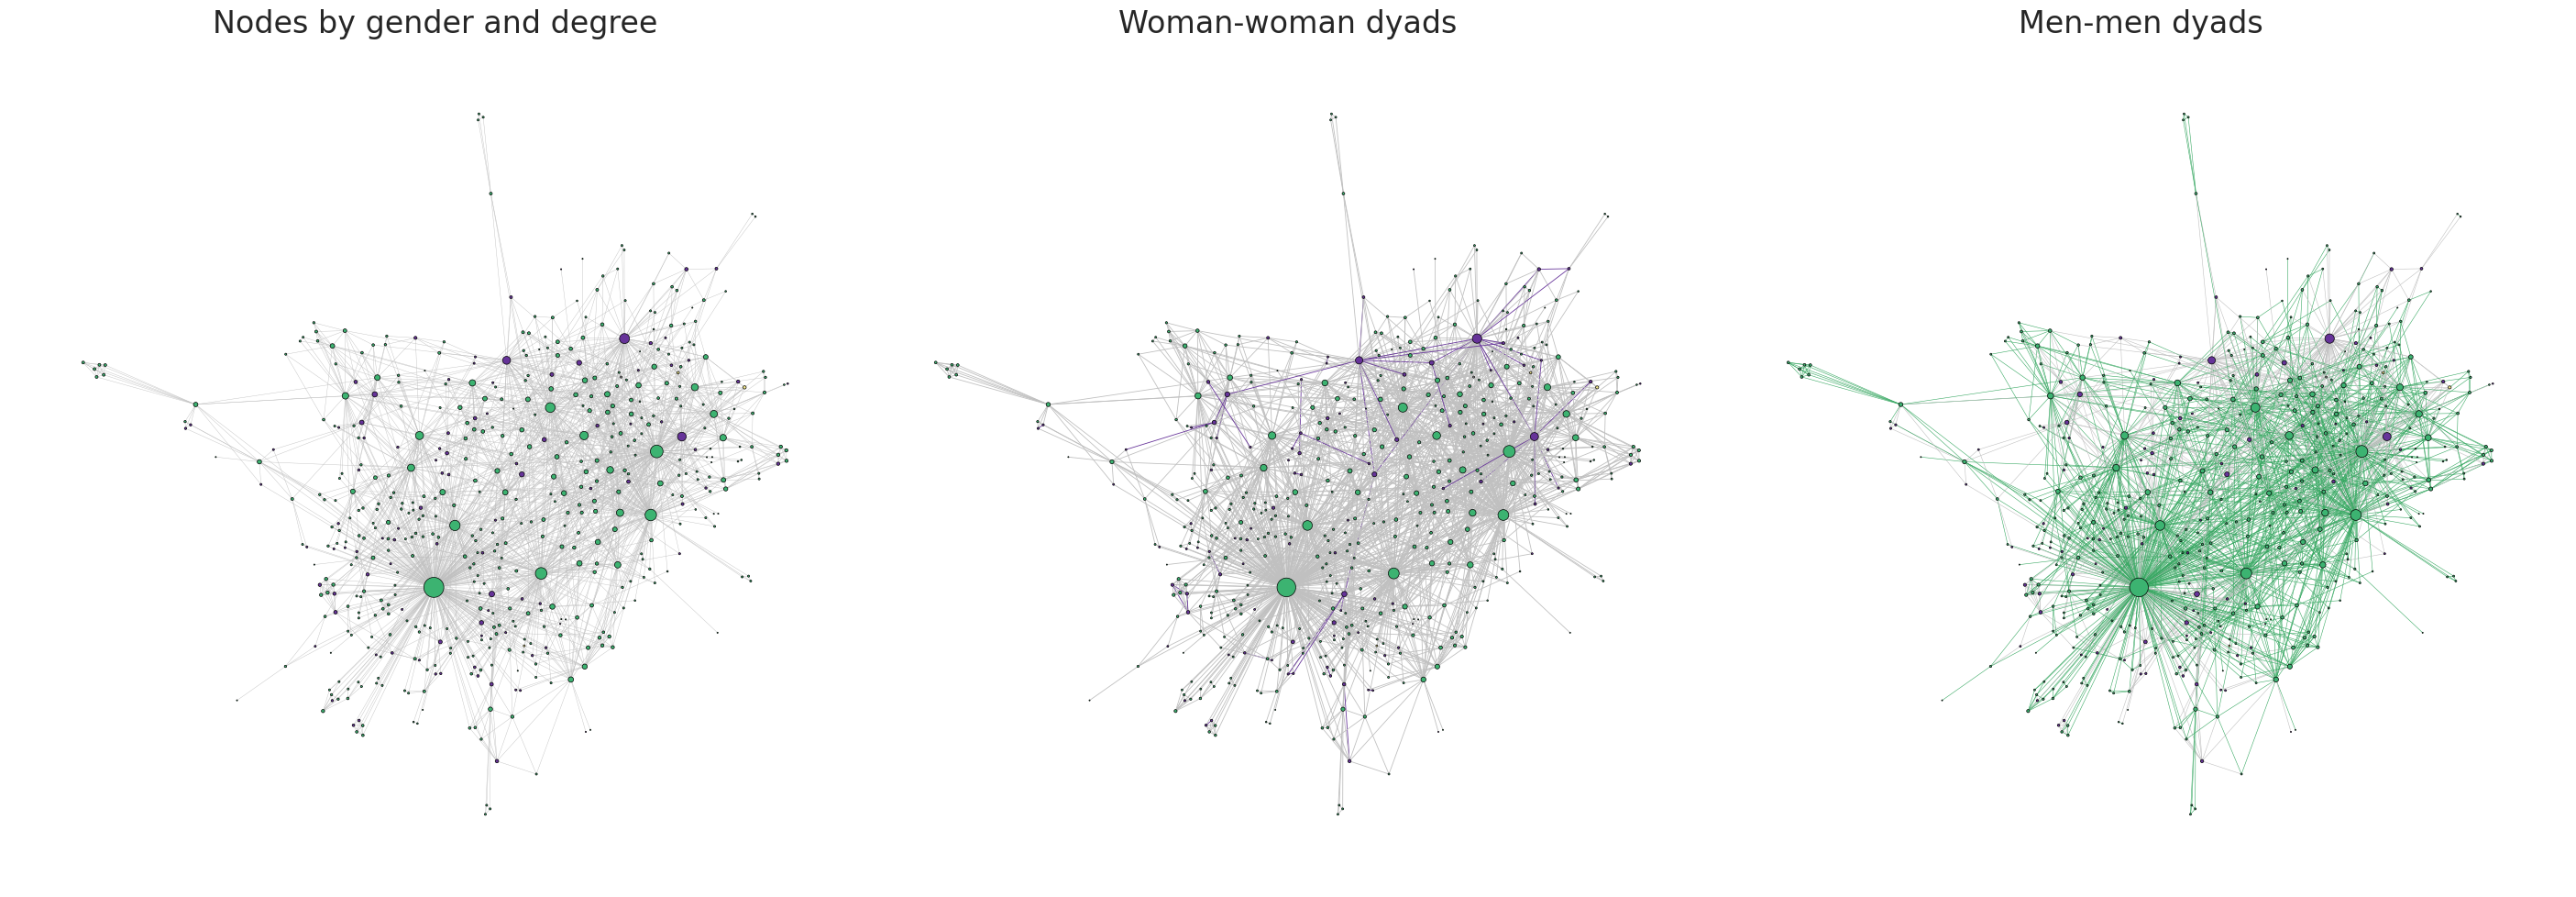

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(36,12))

# All networks with node color by gender

# First: network with node size by degree
nx.draw_networkx_nodes(giant, pos = atlas, 
                       node_size=[v * 0.8 for v in d.values()], 
                       node_color=node_gender, 
                       linewidths=0.5, edgecolors='black', 
                       alpha=1, ax=axes[0])
nx.draw_networkx_edges(giant, pos = atlas, 
                       edge_color='silver', 
                       alpha=1, width=0.3, ax=axes[0])
axes[0].set_axis_off()
axes[0].set_title('Nodes by gender and degree')



# Second: network with female-female dyads
nx.draw_networkx_nodes(giant, pos = atlas, 
                       node_size=[v * 0.7 for v in d.values()], 
                       node_color=node_gender, #'#DCE319', 
                       linewidths=0.5, edgecolors='black', 
                       alpha=1, ax=axes[1])
nx.draw_networkx_edges(giant, pos = atlas, 
                       edge_color=edge_females, 
                       alpha=1, width=0.6, ax=axes[1])
axes[1].set_axis_off()
axes[1].set_title('Woman-woman dyads')



# Third: network with male-male dyads
nx.draw_networkx_nodes(giant, pos = atlas, 
                       node_size=[v * 0.7 for v in d.values()], 
                       node_color=node_gender, 
                       linewidths=0.5, edgecolors='black', 
                       alpha=1, ax=axes[2])
nx.draw_networkx_edges(giant, pos = atlas, 
                       edge_color=edge_males, 
                       alpha=1, width=0.4, ax=axes[2])
axes[2].set_axis_off()
axes[2].set_title('Men-men dyads')


plt.subplots_adjust(wspace=0, hspace=0)

Quick excercise:

1. Add label markers to indicate color map. 
2. Customize the width of the edges by type to improve the visualization of dyadic connections.
3. What can you learn about the collaborations at the New York City Ballet from these visualizations?